In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# from sklearn import metrics
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_noise.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/125sam_10ms_clear_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,263,264,265,266,267,268,269,270,271,272
0,0,0.0,2.193800e-20,8.088500e-21,3.329800e-20,3.267900e-20,2.824400e-20,7.309100e-21,2.298500e-20,9.296500e-21,...,3.038200e-21,2.154900e-21,6.299400e-21,6.818600e-21,2.564300e-21,6.244800e-21,2.411400e-20,2.004800e-20,4.482500e-21,1.325600e-20
1,1,0.0,4.252200e-20,3.836700e-20,1.537100e-20,1.457700e-20,7.591900e-21,9.063400e-21,1.469800e-20,5.246300e-21,...,3.294600e-21,3.658300e-21,1.509900e-20,1.213900e-20,3.980500e-21,4.514400e-21,3.200500e-20,3.279800e-20,1.042900e-20,9.228500e-21


In [3]:
X=Metadata.iloc[:,2:]
y=Metadata.iloc[:,1]
X.shape,y.shape
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1772    1.0
1773    1.0
1774    1.0
1775    1.0
1776    1.0
1777    1.0
1778    1.0
1779    1.0
1780    1.0
1781    1.0
1782    1.0
1783    1.0
1784    1.0
1785    1.0
1786    1.0
1787    1.0
1788    1.0
1789    1.0
1790    1.0
1791    1.0
1792    1.0
1793    1.0
1794    1.0
1795    1.0
1796    1.0
1797    1.0
1798    1.0
1799    1.0
1800    1.0
1801    1.0
Name: 0, Length: 1802, dtype: float64

# Apply SVM on Data

In [4]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [5]:
from sklearn import preprocessing
# X=preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(1802, 272) (1802,)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


In [6]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
cv = ShuffleSplit(X_train.shape[0], test_size=0.20, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train,y_train)
print 'Finish tuning'      

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   23.5s finished


Finish tuning


In [7]:
y_p = clf_Tune.best_estimator_.predict(X_test)
ACC=classification_report(y_test, y_p)
print ACC
ACC_AVG=accuracy_score(y_test, y_p)
print ACC_AVG
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
AUC_Th2_T=metrics.auc(fpr, tpr)
print AUC_Th2_T

             precision    recall  f1-score   support

          0       0.94      0.95      0.94       146
          1       0.96      0.96      0.96       215

avg / total       0.95      0.95      0.95       361

0.9529085872576177
0.9516725071678879


In [8]:
y_p=clf_Tune.best_estimator_.predict(X_test)
print "Accuracy:", clf_Tune.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf_Tune.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.9529085872576177
support: 45.8015267176


In [9]:
# print 'Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_)
clf_Tune.best_params_
# clf_Tune.best_estimator_

{'C': 100.0, 'gamma': 0.01}

In [10]:
# # Utility function to move the midpoint of a colormap to be around
# # the values of interest.
# from matplotlib.colors import Normalize
# class MidpointNormalize(Normalize):

#     def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
#         self.midpoint = midpoint
#         Normalize.__init__(self, vmin, vmax, clip)

#     def __call__(self, value, clip=None):
#         x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
#         return np.ma.masked_array(np.interp(value, x, y))
    
# scores = clf_Tune.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
# #print scores.shape,len(C_range),len(gamma_range)
# plt.figure(figsize=(8, 6))
# #plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
# plt.xlabel('gamma')
# plt.ylabel('C')
# plt.colorbar()
# plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
# plt.yticks(np.arange(len(C_range)), C_range)
# plt.title('Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_))

# #filename='ParameterTuning'
# #save_format='png'
# #print filename+'.'+save_format
# #pp='home/ralfahad/Pictures'
# #plt.savefig(filename+'.'+save_format,dpi=100)
# #plt.show()

# Find Significant correlation with stability selections 

### Make the dataset

In [11]:
# Pre Processing 
X[0,:10]

array([-0.11473811, -0.75474606,  0.98370472,  1.277885  ,  1.65385375,
       -0.05982551,  0.05372991,  0.10802076, -0.05666755, -0.33915173])

In [12]:
from sklearn import preprocessing
X=preprocessing.scale(X)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(1802, 272) (1802, 1)


In [13]:
# np.var(X[:,1])

### Randomized Logistic Regression 

In [14]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm

# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [15]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=5).fit(X, y)
# print lars_cv.alpha_
lars_cv.alphas_

array([0.00458011, 0.00355457, 0.00343845, 0.00293522, 0.0026291 ,
       0.00244662, 0.0022471 ])

In [16]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas, random_state=42,max_iter=1000).fit(X, y)

[0.00458011 0.0041221  0.00366409 0.00320608 0.00274807 0.00229006
 0.00183204 0.00137403 0.00091602 0.00045801]


In [17]:
clf.scores_

array([0.   , 0.52 , 0.345, 0.175, 0.01 , 0.   , 0.   , 0.04 , 0.   ,
       0.   , 0.485, 0.55 , 0.   , 0.   , 0.225, 0.005, 0.01 , 0.205,
       0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.01 , 0.   , 0.005, 0.64 , 0.   , 0.135, 0.   , 0.17 ,
       0.015, 0.   , 0.   , 0.   , 0.   , 0.005, 0.   , 0.   , 0.255,
       0.005, 0.   , 0.   , 0.255, 0.   , 0.005, 0.   , 0.   , 0.01 ,
       0.01 , 0.   , 0.15 , 0.025, 0.   , 0.23 , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.21 , 0.18 , 0.055,
       0.11 , 0.   , 0.   , 0.115, 0.   , 0.   , 0.175, 0.195, 0.005,
       0.   , 0.65 , 0.005, 0.01 , 0.26 , 0.065, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.005, 0.   , 0.   , 0.   , 0.015, 0.   , 0.02 ,
       0.245, 0.   , 0.045, 0.   , 0.34 , 0.005, 0.   , 0.   , 0.   ,
       0.   , 0.005, 0.   , 0.   , 0.405, 0.005, 0.   , 0.   , 0.25 ,
       0.   , 0.005, 0.   , 0.   , 0.02 , 0.   , 0.   , 0.185, 0.06 ,
       0.   , 0.055,

In [18]:
# # Rank the Features according to the importance
# names=range(0,1428) # Feature names used as 1-1428 features
# cn=np.asarray(names) # converted as numpy.ndarray
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# bb=np.asarray(b)
# rakfe=bb[bb[:,0]>0.34]
# ROIs=rakfe[:,1]%68

In [19]:
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), 
#                  cn), reverse=True)

In [20]:
# bb=np.asarray(b)
# # rf=np.where(bb[:,0]>0.7)
# # ifea=np.squeeze(np.asarray(np.where(clf.scores_>=0.815)))
# ra=bb[bb[:,0]>0.50]
# # r=bb[e]
# ra[:,1]%68

In [21]:
# ind=np.where(clf.scores_>=0.710)
# ind

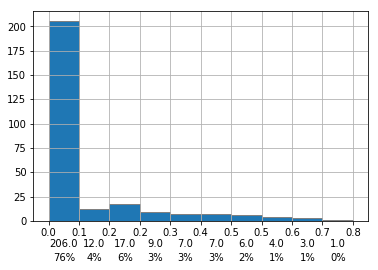

In [22]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [23]:
bins

array([0.   , 0.077, 0.154, 0.231, 0.308, 0.385, 0.462, 0.539, 0.616,
       0.693, 0.77 ])

In [24]:
Th_2_Bins_Index= np.where((bins<=0.9) & (bins>=0.1)) # take the bins within a range
# print Th_2_Bins_Index
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.    0.077 0.154 0.231 0.308 0.385 0.462 0.539 0.616 0.693 0.77 ]
[0.154 0.231 0.308 0.385 0.462 0.539 0.616 0.693 0.77 ]


In [25]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1802, 272) (1802, 1)
(1441, 272) (361, 272) (1441, 1) (361, 1)


In [26]:
X_train[:,1:10]

array([[ 1.14547111, -0.3486898 , -0.36273748, ...,  2.79438802,
        -0.06169983, -0.45173815],
       [-0.80064182, -0.9378179 , -0.926701  , ..., -0.53649227,
        -0.1021937 , -0.54685941],
       [-0.07617115,  1.54792487,  1.2285677 , ...,  0.83197268,
        -0.00301878,  0.63769475],
       ...,
       [ 0.46043359, -0.53557007, -0.45870531, ...,  0.55022474,
        -0.01006783, -0.14605441],
       [ 0.7522567 , -0.06142254, -0.1087716 , ..., -0.53949681,
        -0.08470103, -0.27964278],
       [-0.16562656,  0.28570485,  0.95692065, ...,  0.07348618,
        -0.06263221, -0.3693152 ]])

In [27]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [28]:
# C_range = np.logspace(-2, 2, 5)
C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))],y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed:   15.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 2, 4, 6, 8, 10, 12, 15, 16, 20, 30, 40, 100], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [29]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))])

print accuracy_score(y_test, y_p)

0.9058171745152355


In [30]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.0006,0.0007]
# gamma_range = [0.1,0.01,0.002,0.0005,0.0006,0.0007,]
# C_range = [20, 30,50]
# C_range=[1000,1500]
# C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
# gamma_range = [0.01,0.015, 0.018, 0.002,0.003,0.0004, 0.0005,0.0006,0.0007]; # 0.0007=1/1428 1428 = no. of features
#gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
SV=[]
Bins=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'
        print clf_Tune.best_estimator_

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        SVe=float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape[0]
        print SVe
        SV.append(SVe)
#         print 'Report',classification_report(y_test, y_p)
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.154
(1441, 54)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


(1441, 54) (1441, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 54)
ACC 0.9058171745152355 0.9099394711691621
0.318528799445
0.23099999999999998
(1441, 37)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


(1441, 37) (1441, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 37)
ACC 0.8919667590027701 0.893915259636827
0.324774462179
0.308
(1441, 28)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


(1441, 28) (1441, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 28)
ACC 0.8947368421052632 0.8984389933099713
0.344205412908
0.385
(1441, 21)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


(1441, 21) (1441, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 21)
ACC 0.8698060941828255 0.8720133800573431
0.369882026371
0.46199999999999997
(1441, 14)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.9s


(1441, 14) (1441, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 14)
ACC 0.8393351800554016 0.8442338324307105
0.408049965302
0.539
(1441, 8)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


(1441, 8) (1441, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 8)
ACC 0.817174515235457 0.820133800573431
0.476752255378
0.616
(1441, 4)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


(1441, 4) (1441, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 4)
ACC 0.7562326869806094 0.7601784007645748
0.578070784178
0.693
(1441,)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
error at: 0.693
0.77
(1441,)
Fitting 5 folds for each of 20 candidates, totalling 100 fits
error at: 0.77


In [31]:
# accuracy_score(y_test, y_p)
# MulticlassAuc(y_test,y_p)

In [32]:
        
#         ACC_Th2_T=accuracy_score(y_test, y_p)
#         AUC_Th2_T=MulticlassAuc(y_test,y_p)
#         print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
#         print 'ACC',ACC_Th2_T,AUC_Th2_T
#         ACC_Th2.append(ACC_Th2_T)
#         AUC_Th2.append(AUC_Th2_T)
#         Bins.append(i)
#     except:
#         print 'error at:',i
#     # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
#     # roc_auc_T = auc(false_positive_rate, true_positive_rate)
#     # print 'AUC',roc_auc_T
#     # AUC_Th2.append(roc_auc_T)

In [33]:
ACC_Th2 

[0.9058171745152355,
 0.8919667590027701,
 0.8947368421052632,
 0.8698060941828255,
 0.8393351800554016,
 0.817174515235457,
 0.7562326869806094]

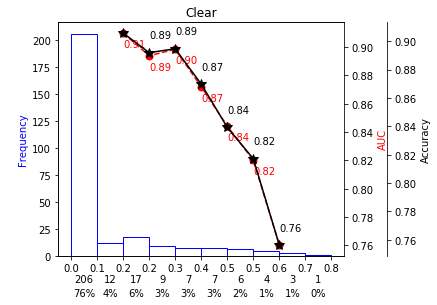

In [34]:
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,10,facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed' )#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red')
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.2f" % j),xy=(i,j-0.01), color ='red') ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black')






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.2f" % j),xy=(i,j+0.01), color='black')##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black")
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')


    
    
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=0.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency')
ax.yaxis.label.set_color('Blue')
plt.title("Clear")
plt.tight_layout()
# #Save the image

filename='Corr_StabilitySelection_TH2'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



In [35]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
All_SV=[]
NumberofElement=[]
for i,j,k,l in zip(Th_2_Bins,ACC_Th2,AUC_Th2, SV):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
#     print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index),("{0:.2f}".format(l))
#     NumberofElement.append(len(Th2Index))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))
    All_SV.append("{0:.2f}".format(l))

# Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
#            pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_SV)],axis=1)
# Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','SV']
Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle']
Selected_Feature_Result

0.15 0.91 0.91 54
0.23 0.89 0.89 37
0.31 0.89 0.90 28
0.39 0.87 0.87 21
0.46 0.84 0.84 14
0.54 0.82 0.82 8
0.62 0.76 0.76 4


,Threshold,ACC,AUC,NoEle
0,0.15,0.91,0.91,54
1,0.23,0.89,0.89,37
2,0.31,0.89,0.90,28
3,0.39,0.87,0.87,21
4,0.46,0.84,0.84,14
5,0.54,0.82,0.82,8
6,0.62,0.76,0.76,4


In [36]:
Th_2_Bins[4]

0.46199999999999997

In [37]:
# Need to chage gamma range . It is selecting too many features
# Let 0.34 is our best Thr. TO get the index numer with this thr
fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[2])))
fealoc
# len(fealoc)
# Do you get it? yes > How about number of support of the model?

array([  1,   2,  10,  11,  31,  82, 103, 112, 140, 143, 150, 153, 154,
       171, 180, 204, 211, 216, 222, 228, 232, 242, 243, 244, 246, 258,
       270, 271])

In [38]:
ROI=fealoc%68
ROI
np.unique(ROI,return_counts=True)

(array([ 0,  1,  2,  4,  7, 10, 11, 12, 14, 17, 18, 24, 28, 31, 35, 38, 39,
        40, 42, 44, 54, 66, 67]),
 array([1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
        1]))

In [39]:
len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

23

In [40]:
for th in Th_2_Bins:
    clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
    print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape
    print 'Finish tuning'
    print float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100
# use tuned parameter on to get model
#y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


(1441, 54) (1441, 1)
Finish tuning
31.8528799445
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


(1441, 37) (1441, 1)
Finish tuning
32.4774462179
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


(1441, 28) (1441, 1)
Finish tuning
34.4205412908
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


(1441, 21) (1441, 1)
Finish tuning
36.9882026371
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.9s


(1441, 14) (1441, 1)
Finish tuning
40.8049965302
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


(1441, 8) (1441, 1)
Finish tuning
47.6752255378
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s


(1441, 4) (1441, 1)
Finish tuning
57.8070784178


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


In [41]:
# float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

In [42]:
# result it overfitting need to be less or equal to 40%

# Rank the Feature Vectors as their importance

In [43]:
# Rank the Features according to the importance
names=range(0,1428) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=Th_2_Bins[2]]
ROIs=rakfe[:,1]%68
# print ROIs

In [44]:
# # b
# ROIstime=np.floor(rakfe[:,1]/68)
# timeloc=ROIstime*10
# plt.hist(timeloc, bins=20)

In [45]:
ROI
print np.unique(ROI,return_counts=True)
print len(np.unique(ROIs))

(array([ 0,  1,  2,  4,  7, 10, 11, 12, 14, 17, 18, 24, 28, 31, 35, 38, 39,
       40, 42, 44, 54, 66, 67]), array([1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1]))
23


In [46]:
len(ROIs)

28

In [47]:
Roiname=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")

In [48]:
nor=len(ROIs)
shdkroi=Roiname['Desikan_Freesurfer_v5.1'] # "Desikan_Freesurfer_v5.1"  is the label of short name columns 
sdk=shdkroi[ROIs]# ROIs is the index of label
# sdk.head(nor)

In [49]:
dkfull=Roiname['BrainMesh_ICBM152.nv']
dk=dkfull[ROIs]
print dk.head(nor)
len(dk.head(nor))

42.0              pericalcarine L
14.0           inferiorparietal L
31.0             middletemporal R
66.0         transversetemporal L
18.0                     insula L
14.0           inferiorparietal L
24.0       lateralorbitofrontal L
11.0                frontalpole R
12.0                   fusiform L
1.0                    bankssts R
40.0           parstriangularis L
10.0                frontalpole L
38.0              parsorbitalis L
44.0                postcentral L
54.0       rostralmiddlefrontal L
18.0                     insula L
39.0              parsorbitalis R
0.0                    bankssts L
44.0                postcentral L
28.0        medialorbitofrontal L
7.0                      cuneus R
7.0                      cuneus R
4.0         caudalmiddlefrontal L
2.0     caudalanteriorcingulate L
17.0           inferiortemporal R
35.0            parahippocampal R
35.0            parahippocampal R
67.0         transversetemporal R
Name: BrainMesh_ICBM152.nv, dtype: object


28

In [50]:
nor=len(ROIs)
aa=pd.DataFrame(dk.values[0:nor])
aa.columns=['ROIs']
Toprois=pd.DataFrame(aa.values)
# print Toprois

In [51]:
saa=pd.DataFrame(sdk.values[0:nor])
saa.columns=['short ROIs']
sToprois=pd.DataFrame(saa.values)
# print sToprois

In [52]:
nor1=len(ROIs)
sc=pd.DataFrame(bb[0:nor1,0])
sn=pd.concat([Toprois,sToprois,sc],axis=1)
sn.columns=['Fullname','ROIs short name', ' Feature score'] # sn: score and roi
# ddd=pd.DataFrame(bb[0:16,0],sToprois)
sn

,Fullname,ROIs short name,Feature score
0,pericalcarine L,lPERI,0.770
1,inferiorparietal L,lIP,0.650
2,middletemporal R,rMT,0.640
3,transversetemporal L,lTRANS,0.635
4,insula L,lINS,0.575
5,inferiorparietal L,lIP,0.555
6,lateralorbitofrontal L,lLOF,0.550
7,frontalpole R,rFP,0.550
8,fusiform L,lFUS,0.530
9,bankssts R,rBKS,0.520


In [53]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,pericalcarine L,lPERI,0.77
1,inferiorparietal L,lIP,0.65
2,middletemporal R,rMT,0.64
3,transversetemporal L,lTRANS,0.635
4,insula L,lINS,0.575
5,lateralorbitofrontal L,lLOF,0.55
6,frontalpole R,rFP,0.55
7,fusiform L,lFUS,0.53
8,bankssts R,rBKS,0.52
9,parstriangularis L,lPT,0.515


In [54]:
# alluR.to_csv('Top14.csv')

In [55]:
# alluR

In [56]:
len(clf.scores_)

272

# AllROIs_stability selection_score

In [57]:
# g=clf.scores_
# allROIs=range(0,68)
# x=[];
# for i in allROIs:
# #     print i
#     r=np.arange(i,len(g),68)
#     l=np.int_(r)
# #     ll=g[r]
#     ll=g[l]
#     x.append(ll)
# hh=pd.DataFrame(x)  
# t=np.linspace(0,200,4)
# yu=hh.values
# # yu=hh.values[[0,1,2,3,4,16],:]
# plt.plot(yu)
# plt.xlim(0, 200)
# plt.ylim(0,1)
# plt.grid(True)
# plt.ylabel("Stability scores")
# plt.xlabel("Epoch time (ms)")
# plt.show()

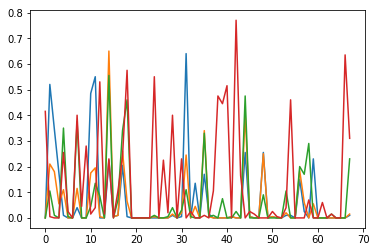

In [64]:
g=clf.scores_
allROIs=range(0,68)
x=[];
for i in allROIs:
#     print i
    r=np.arange(i,len(g),68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x) 
axis_font = {'fontname':'Arial', 'size':'16'}
# leg=[r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$']
plt.plot(hh)
# plt.plot(hh.iloc[:,0:3])
# plt.xlim(0,67))
# plt.ylim(0,1)
# plt.ylabel('ROIs',**axis_font)
# plt.ylabel('Stability score',**axis_font)
# plt.legend(leg)
plt.show()

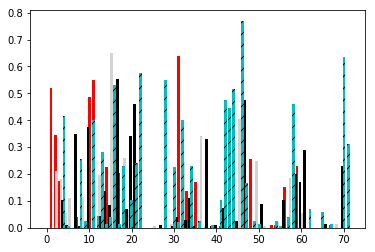

In [59]:
N=68
ind=np.arange(0,N)
barWidth = 0.68
len(hh.iloc[:,0])
plt.bar(ind,hh.iloc[:,0],width = barWidth,color='r')
plt.bar(ind+2*barWidth,hh.iloc[:,1],width = barWidth,color='lightgray')
plt.bar(ind+4*barWidth,hh.iloc[:,2],width = barWidth,color='k')
plt.bar(ind+6*barWidth,hh.iloc[:,3],width = barWidth,color='c',hatch="//")
# plt.bar(ind,)
plt.show()

# Top score selected ROIs

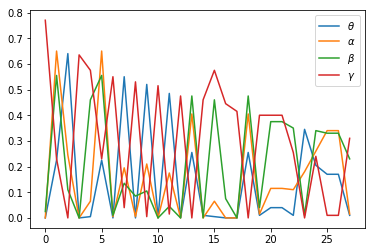

In [60]:
g=clf.scores_
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,len(g),68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x) 
axis_font = {'fontname':'Arial', 'size':'16'}
leg=[r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$']
# plt.hist(hh.iloc[:,0])
plt.plot(hh.iloc[:,0:10])
# plt.xlim(0,67)
l=np.arange(0,68)
# plt.ylim(0,1)
# plt.ylabel('ROIs',**axis_font)
# plt.ylabel('Stability score',**axis_font)
plt.legend(leg)
plt.show()

In [61]:
ROIs

array([42., 14., 31., 66., 18., 14., 24., 11., 12.,  1., 40., 10., 38.,
       44., 54., 18., 39.,  0., 44., 28.,  7.,  7.,  4.,  2., 17., 35.,
       35., 67.])

# Band and ROIs features scores

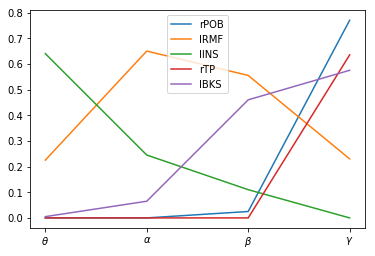

In [65]:
leg=['rPOB','lRMF', 'lINS','rTP','lBKS']
g=clf.scores_
x=[];
for i in ROIs: # ROIs is the number of selected among the whole data
#     print i
    r=np.arange(i,len(g),68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
#     print r%68 # this is the same region for different band theta, alpha, beta, and gamma
    x.append(ll)
hh=pd.DataFrame(x) 
# t=np.linspace(0,3,4)
t=[r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$']
axis_font = {'fontname':'Arial', 'size':'16'}
# leg=[r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$']
yu=hh.values
yu=hh.values[[0,1,2,3,4],:]
plt.plot(t,yu.T)
# plt.plot(hh.iloc[:,0:5])
# plt.xlim(0,67)
l=np.arange(0,68)
# plt.ylim(0,1)
# plt.ylabel('ROIs',**axis_font)
# plt.ylabel('Stability score',**axis_font)
plt.legend(leg)
plt.show()